In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree

import json
import requests

In [2]:
df = pd.read_csv('data/spotify-largeset.csv')
df.drop(['index'], axis=1, inplace=True)

genre_df = pd.read_csv('data/data_by_genres.csv')

genre_df['genres'].nunique()

3232

In [3]:
genre_df.tail()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
3227,zim urban groove,0.003910,0.553000,42672.000000,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1
3228,zolo,0.208648,0.533837,264101.612142,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1
3229,zouk,0.272928,0.641889,441641.777778,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1
3230,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,0
3231,zydeco,0.381496,0.625963,184088.078095,0.572417,0.019234,0.262545,-10.643750,0.072440,130.137242,0.792174,27.703810,9,1


In [4]:
df['FullText'] = df['artists'].str.cat(df['name'], sep=" ")
df['FullText'] = df['FullText'].apply(lambda x: x.lower())

In [5]:
df.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,Tempo Basket,duration_sec,FullText
0,0.994980,Mamie Smith,0.605263,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,Keep A Song In Your Soul,12,1920,0.117146,0.615900,0.6340,1920,Allegro,168.33,mamie smith keep a song in your soul
1,0.645582,Screamin' Jay Hawkins,0.862348,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,I Put A Spell On You,7,1920-01-05,0.066834,0.356823,0.9500,1920,Anadante,150.20,screamin' jay hawkins i put a spell on you
2,0.996988,Mamie Smith,0.654858,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,Golfing Papa,4,1920,0.217772,0.400810,0.6890,1920,Anadante,163.83,mamie smith golfing papa
3,0.000174,Oscar Velazquez,0.738866,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.053191,0.525640,0.0422,1920,Allegro,422.09,oscar velazquez true house music - xavier sant...
4,0.296185,Mixe,0.712551,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Xuniverxe,2,1920-10-01,0.096120,0.501324,0.2990,1920,Allegro,165.22,mixe xuniverxe
5,1.000000,Mamie Smith & Her Jazz Hounds,0.429150,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,...,Crazy Blues - 78rpm Version,9,1920,0.049687,0.426559,0.4770,1920,Anadante,198.63,mamie smith & her jazz hounds crazy blues - 78...
6,0.995984,Mamie Smith,0.791498,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,...,Don't You Advertise Your Man,5,1920,0.074093,0.351743,0.4870,1920,Anadante,195.20,mamie smith don't you advertise your man
7,1.000000,Mamie Smith & Her Jazz Hounds,0.479757,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,...,Arkansas Blues,0,1920,0.036170,0.323539,0.3660,1920,Anadante,186.17,mamie smith & her jazz hounds arkansas blues
8,1.000000,Francisco Canaro,0.474696,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,...,La Chacarera - Remasterizado,0,1920-07-08,0.092741,0.534112,0.6210,1920,Allegro,146.84,francisco canaro la chacarera - remasterizado
9,0.006847,Meetya,0.577935,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,...,Broken Puppet - Original Mix,0,1920-01-01,0.055820,0.521517,0.1190,1920,Allegro,476.30,meetya broken puppet - original mix


In [6]:
df['FullText'][6]

"mamie smith don't you advertise your man"

In [7]:
# 3 year rolling correlation (year, accousticness)
# df.set_index('year', inplace=True, drop=True)
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'Tempo Basket', 'duration_sec', 'FullText'],
      dtype='object')

In [8]:
df.drop(['explicit', 'id', 'release_date', 'popularity', 'duration_sec', 'duration_ms', 'mode'], axis=1, inplace=True)

# Standardize, perform PCA, scree plot

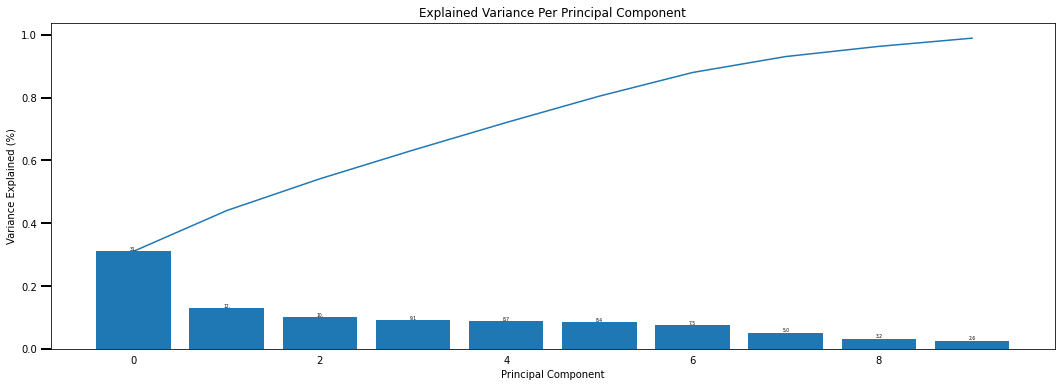

In [9]:
df_new = df.drop(['artists', 'name', 'Tempo Basket', 'FullText'], axis=1) #  , 'year'

x = StandardScaler().fit_transform(df_new)

# Apply PCA to the data
pca = PCA(10)
pca_features = pca.fit_transform(x)



# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    INPUT: pca - the result of instantian of PCA in scikit learn      
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=10)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

In [10]:
# Shows how much variance is explained by each component
pca.explained_variance_ratio_

array([0.31037609, 0.12976472, 0.10121133, 0.09129916, 0.08786734,
       0.08405442, 0.0752937 , 0.05076042, 0.03243065, 0.02613675])

# Kmeans with PCA

In [11]:
pca = PCA(n_components=10)
pca.fit(df_new)

pca.transform(df_new)
scores_pca = pca.transform(df_new)
scores_pca

array([[ 5.79755530e+01, -3.83724502e-02, -3.22194954e-01, ...,
        -1.95757978e-02,  1.86108943e-01, -8.12538233e-02],
       [ 5.79704835e+01, -3.60985295e-02, -7.93389120e-01, ...,
         1.84917434e-01, -5.99128040e-02, -7.99526143e-02],
       [ 5.79900972e+01, -5.03822808e+00, -3.50308995e-01, ...,
         6.01133384e-02,  5.12042568e-02,  3.08850554e-02],
       ...,
       [-4.20163364e+01, -1.32497943e+00,  7.65116022e-01, ...,
         1.05610799e-01, -6.43030395e-02, -4.73206766e-02],
       [-4.30039109e+01, -5.32964265e+00,  6.92872686e-01, ...,
        -9.51013946e-02,  1.79593200e-01, -6.76521197e-02],
       [-4.20296990e+01,  1.67581469e+00,  4.86802280e-01, ...,
        -1.62284420e-01, -8.73091680e-02, -2.53437767e-02]])

In [12]:
# css = cluster sum of squares
css = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    css.append(kmeans_pca.inertia_)

## Elbow Method

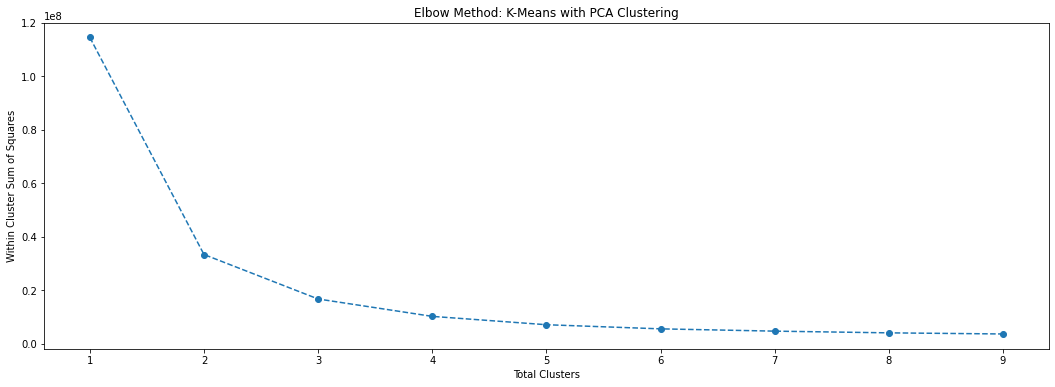

NOTE: Elbow is at 3


In [13]:
plt.figure(figsize=(18, 6))
plt.plot(range(1, 10), css, marker='o', linestyle='--')
plt.xlabel('Total Clusters')
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Method: K-Means with PCA Clustering")
plt.show()

print("NOTE: Elbow is at 3")

# Eigen Values and Loadings

##  PC0 

In [14]:
# Have a look at PC0
pc0 = pca.components_[0]
list(zip(pc0, df_new.columns))

[(0.009578754898167454, 'acousticness'),
 (-0.0014736358336979727, 'danceability'),
 (-0.005492369102046911, 'energy'),
 (0.0021558675054970354, 'instrumentalness'),
 (-0.002848076239213411, 'key'),
 (-1.144456548041867e-05, 'liveness'),
 (0.0015203604860269681, 'loudness'),
 (-0.00018683952418138146, 'speechiness'),
 (-0.0007411273721531344, 'tempo'),
 (0.0004455427292187658, 'valence'),
 (-0.9999300256100994, 'year')]

In [15]:
eig_values = pca.explained_variance_

structure_loading_1 = pc0* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=df_new.columns)
str_loading_1.sort_values(ascending=False)

acousticness         0.249503
instrumentalness     0.056155
loudness             0.039602
valence              0.011605
liveness            -0.000298
speechiness         -0.004867
tempo               -0.019305
danceability        -0.038385
key                 -0.074185
energy              -0.143063
year               -26.045735
dtype: float64

## PC1

In [16]:
# Have a look at PC1
pc1 = pca.components_[1]
list(zip(pc1, df_new.columns))

[(-0.0018299432050033716, 'acousticness'),
 (0.001147158347949102, 'danceability'),
 (0.0019981052999864697, 'energy'),
 (-0.00012786691445709433, 'instrumentalness'),
 (0.9999889694897367, 'key'),
 (-0.0003668643999785576, 'liveness'),
 (-0.00040789521874016294, 'loudness'),
 (0.0006146971092882485, 'speechiness'),
 (8.280716418271778e-05, 'tempo'),
 (0.0021013352175537365, 'valence'),
 (-0.002878571251684223, 'year')]

In [17]:
eig_values = pca.explained_variance_

structure_loading_2 = pc1* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=df_new.columns)
str_loading_2.sort_values(ascending=False)

key                 3.502075
valence             0.007359
energy              0.006998
danceability        0.004017
speechiness         0.002153
tempo               0.000290
instrumentalness   -0.000448
liveness           -0.001285
loudness           -0.001428
acousticness       -0.006409
year               -0.010081
dtype: float64

## PC3

In [18]:
# Have a look at PC3
pc3 = pca.components_[4]
list(zip(pc3, df_new.columns))

[(-0.44069199799139297, 'acousticness'),
 (-0.40463820839095366, 'danceability'),
 (0.11337023267177147, 'energy'),
 (-0.22942540689566182, 'instrumentalness'),
 (0.0010217888957858774, 'key'),
 (0.13303781165778544, 'liveness'),
 (-0.013332976503678587, 'loudness'),
 (-0.03543316189824306, 'speechiness'),
 (-0.007434450300485511, 'tempo'),
 (-0.7465622000732075, 'valence'),
 (-0.005087828024805285, 'year')]

In [19]:
eig_values = pca.explained_variance_

structure_loading_3 = pc1* np.sqrt(eig_values[9])
str_loading_3 = pd.Series(structure_loading_3, index=df_new.columns)
str_loading_3.sort_values(ascending=False)

key                 0.094600
valence             0.000199
energy              0.000189
danceability        0.000109
speechiness         0.000058
tempo               0.000008
instrumentalness   -0.000012
liveness           -0.000035
loudness           -0.000039
acousticness       -0.000173
year               -0.000272
dtype: float64

In [24]:
df.head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,index,Tempo Basket,duration_sec,FullText
0,0.99498,Mamie Smith,0.605263,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,...,12,1920,0.117146,0.6159,0.634,1920,0,Allegro,168.33,mamie smith keep a song in your soul


In [25]:
df = pd.read_csv('data/spotify-largeset.csv')
df['FullText'] = df['artists'].str.cat(df['name'], sep=" ")
df['FullText'] = df['FullText'].apply(lambda x: x.lower())

df_new = df.copy()
df_numerics = df_new.drop(['Tempo Basket', 'year', 'name', 
                       'artists', 'explicit', 'release_date', 'id',
                       'popularity', 'duration_sec', 'duration_ms', 'FullText'], axis=1)

df_scaled = StandardScaler().fit_transform(df_numerics)

# Apply the model
tree = KDTree(df_scaled)

In [26]:
from joblib import dump, load

model_path = 'kd_treemodel.joblib'
dump(tree, model_path)

['kd_treemodel.joblib']

In [27]:
# Query the KDTree model for k nearest neighbors.
# (Alternatively) we can use query_radius
# Check sklearn docs 
# https://scikit-learn.org/stable/modules/generated/
# sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree

num_of_songs = 10
dist, indxs = tree.query(df_scaled, k=num_of_songs+1)

## Check distance of k=10 similar songs

In [28]:
# Create column names first
column_names = ['Searched_Song']
for i in range(1, num_of_songs+1):
    column_names.append(f'Nearest_Song{i}')
    
# Calculate scores from distances
scores = (1 - ((dist - dist.min()) / (dist.max() - dist.min()))) * 100
dist_df = pd.DataFrame(scores.tolist(), columns=column_names)

# Limit decimal place output to 1
dist_df = dist_df.round(decimals=1)

# Replace Searched Song score with the track_id
dist_df['Searched_Song'] = df.FullText

# Print the shape of the dataframe
print(f'df.shape = {dist_df.shape}')

# Check distances of similar top 10 nearest songs
dist_df.head()

df.shape = (165755, 11)


,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10
0,mamie smith keep a song in your soul,84.4,84.4,84.0,81.1,80.3,79.7,79.1,79.0,78.6,77.0
1,screamin' jay hawkins i put a spell on you,84.1,83.4,78.3,77.9,77.7,75.8,74.5,74.4,73.9,73.7
2,mamie smith golfing papa,74.6,74.2,74.1,73.9,72.1,72.1,72.0,71.5,71.5,71.0
3,oscar velazquez true house music - xavier sant...,82.1,79.6,79.2,78.7,78.1,77.7,76.3,76.0,75.7,75.4
4,mixe xuniverxe,81.4,80.9,80.2,79.1,78.4,75.4,75.0,74.9,73.9,72.6


## Save Similar Songs

In [29]:
# Making an array of the Track IDs
tracks = np.array(df.FullText)

# A function that creates list of the each song with its nearest neighbors
def find_similars(tracks, indxs):
    """For each track in the dataset find similar songs"""
    similars = []
    for row in indxs:
        ids = [tracks[i] for i in row]
        similars.append(ids)
    return similars

# The first item in each row is a song in the original database.  
# The next 10 rows are its closest neighbors in the KDTree.
nearest_neighbors = find_similars(tracks, indxs)

# Convert it to dataframe
nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=column_names)
nn = nearest_neighbors_df.copy()

In [30]:
final_df = nearest_neighbors_df.copy()
final_df.shape

(165755, 11)

In [31]:
# nearest_neighbors_df.query('Searched_Song == "miley cyrus adore you"')

In [33]:
# nearest_neighbors_df['Searched_Song'].filter(like='miley cyrus adore you')
nn.query('Searched_Song.str.contains("just the way")', engine='python')

,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10
10693,billy joel just the way you are,billy joel just the way you are,the band long black veil - remastered,don mclean american pie,the beatles mr moonlight - remastered 2009,lindisfarne scarecrow song - 2003 digital rema...,firefall cinderella,sam cooke nobody knows the trouble i've seen,joan sebastian me gustas,ritchie valens framed,"barbara mason oh, how it hurts"
10795,billy joel just the way you are,billy joel just the way you are,the band long black veil - remastered,don mclean american pie,the beatles mr moonlight - remastered 2009,lindisfarne scarecrow song - 2003 digital rema...,firefall cinderella,sam cooke nobody knows the trouble i've seen,joan sebastian me gustas,ritchie valens framed,"barbara mason oh, how it hurts"
12978,barry white just the way you are,"onda vaselina te quiero tanto, tanto",gary stewart an empty glass,air supply lonely is the night,randy travis i told you so,april wine just between you and me,alan jackson i'd love you all over again,john berry your love amazes me,pescado rabioso bajan,james taylor walking man,james taylor walking man - 2019 remaster
16961,bruno mars just the way you are,zz top sharp dressed man - 2008 remaster,aerosmith janie's got a gun,modest mouse float on,vance joy fire and the flood,ratt wanted man,starship nothing's gonna stop us now,metallica of wolf and man,(hed) p.e. bartender,alejandra guzman mirala miralo,"kevin rudolf', 'lil wayne let it rock"
17308,anthem lights best of 2011: just the way you a...,deniece williams silly,billy may perfidia,mariah carey hero,the jackson 5 have yourself a merry little chr...,paddy reilly the fields of athenry,amy grant hark! the herald angels sing,betsy wolfe a part of that,tori amos silent all these years - 2006 remaster,air supply the one that you love,"anita darian', 'louise parker', 'the merrill s..."
37030,"parmalee', 'blanco brown just the way",toby keith american ride,turnpike troubadours 7 & 7,sam hunt leave the night on,sara evans suds in the bucket,ramones do you wanna dance? - 2001 remaster,lady a downtown,fobia veneno vil,"scandal', 'patty smyth goodbye to you (feat. p...","the rolling stones', 'bob clearmountain neighb...",the go-go's how much more
49051,phil collins that's just the way it is - 2016 ...,elton john empty garden (hey hey johnny) - rem...,eric clapton wonderful tonight,los temerarios una guitarra llora,"keith whitley miami, my amy",lefty frizzell get this stranger out of me,alan jackson (who says) you can't have it all,donna fargo the happiest girl in the whole u.s.a.,john conlee lady lay down,frankie valli & the four seasons can't take my...,juan gabriel el día que me acaricies lloraré
51648,diana krall just the way you are,thelonious monk let's call this - rvg remaster,thelonious monk let's call this,half-handed cloud nativity costume (2000 year'...,half-handed cloud nativity costume (2000 year'...,ed sheeran tenerife sea,fred weyrich mademoiselle madeleine (slowfox),the triffids new year's greetings - demo with ...,"antônio carlos jobim', 'frank sinatra wave",the dave brubeck quartet one song - mono version,"roy orbison', 'alex orbison', 'chuck turner yo..."
80109,billy joel just the way you are - live at carn...,pearl jam hold on - bonus track,brantley gilbert my kind of crazy,kid cudi damaged,seal kiss from a rose,michael w. smith friends,shania twain you've got a way,the byrds chimes of freedom,"lady a baby, it's cold outside","james ingram', 'dolly parton the day i fall in...",sonny rollins there are such things
97487,billy joel just the way you are,los primos mx mi bello ángel,paul anka memories are made of this,the isley brothers don't let me be lonely tonight,"gene krupa big band', ""anita o'day"", 'roy eldr...","randy newman the time of your life - from ""a b...",nancy sinatra it ain't me babe,michael w. smith friends,stone temple pilots pretty

In [34]:
nn['Searched_Song'][44910]

'charles wright & the watts 103rd street rhythm band do your thing'

In [35]:
nearest_neighbors_df.query('Searched_Song.str.contains("greeneries")', engine='python')

,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10


## Save as a .csv

In [36]:
import sys

def save_dataframe_as_csv(df=None, filename=None):
    """
    Saves dataframe in csv format
    
    Arguments
    ---------
    df: Pandas DataFrame
    filename: File path or filename
    
    Returns
    -------
    .csv file
    """
    try: 
        if not filename.endswith(".csv"):
            filenameb += ".csv"
        df.to_csv(filename, index=False)
        print(f"DataFrame saved @: {filename}")
    except Exception as e:
        print("DatFrame could not be saved: ", sys.exc_info()[0])
        raise

In [37]:
save_dataframe_as_csv(nearest_neighbors_df, "data/artist_song_df.csv")

DataFrame saved @: data/artist_song_df.csv


In [38]:
nearest_neighbors_df.head()

,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10
0,mamie smith keep a song in your soul,billie holiday did i remember? - take 1,billie holiday did i remember? - take 1,peggy lee my little cousin,"louis armstrong & his hot seven', 'louis armst...","billie holiday', 'eddie heywood let's do it (w...","billie holiday', 'eddie heywood let's do it (w...","billie holiday me, myself and i - take 2",robert johnson preachin' blues (up jumped the ...,"billie holiday', 'eddie heywood let's do it (w...",bing crosby i've got plenty to be thankful for
1,screamin' jay hawkins i put a spell on you,"don charles', 'the singing dogs jingle bells -...",el gran combo de puerto rico ojos chinos,frankie ruiz la cura,jerry rivera cara de niño,the pied pipers should i,marcos valle estrelar,willie nelson shotgun willie,maná mariposa traicionera - 2020 remasterizado,johnny cash the wreck of the old 97,bob wills & his texas playboys that's what i l...
2,mamie smith golfing papa,p. suribabu entha ghorapathame,mamie smith the lure of the south,félix mayol lilas blanc,original broadway cast of 'three wishes for ja...,tin tan y marcelo la cantinera,the pied pipers limehouse blues,dick haymes can i come in for a second,georgius ma gosse,manna dey japo ram ram ram,billie holiday you're just a no account
3,oscar velazquez true house music - xavier sant...,shungi music crew the storm,"suffused', 'alfoa year 2008 - alfoa remix",jeremy olander araoz,sean & xander shimmer of tides (year in review...,"suffused', 'airwave', 'michael & levan', 'stiv...",arnej the ones that get away [asot 384] - orig...,oscar velazquez true house music - original ma...,suffused year 2008 - alfoa remix,arkham knights xposed (year in review 2020),kjrock happy new year 2017
4,mixe xuniverxe,"surf mesa', 'emilee ily (i love you baby) (fea...","sia', 'alan walker move your body - alan walke...",the pussycat dolls when i grow up,ariana grande no tears left to cry,"aaron smith', 'krono', 'luvli dancin (feat. lu...",black eyed peas meet me halfway,"calvin harris', 'disciples how deep is your love",little junior parker love my baby,juice wrld let me know (i wonder why freestyle),new edition i'm still in love with you


## Save as JSON file

In [39]:
def save_dataframe_as_json(df=None, filename=None, orient="records"):
    """
    Saves dataframe in a JSON format
    
    Arguments
    ---------
    df: Pandas DataFrame
    filename: file path or filename
    
    Returns
    -------
    JSON file
    """
    try:
        if not filename.endswith('.json'):
            filename += '.json'
        df.to_json(filename, orient=orient)
        print(f"DataFrame saved @: {filename}")
    except Exception as e:
        print("DataFrame could not be saved: ", sys.exc_info()[0])
        raise

In [40]:
save_dataframe_as_json(nearest_neighbors_df, "data/artist_song_df.json")

DataFrame saved @: data/artist_song_df.json


In [41]:
json_df=pd.read_json('data/artist_song_df.json')
json_df.head()

,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10
0,mamie smith keep a song in your soul,billie holiday did i remember? - take 1,billie holiday did i remember? - take 1,peggy lee my little cousin,"louis armstrong & his hot seven', 'louis armst...","billie holiday', 'eddie heywood let's do it (w...","billie holiday', 'eddie heywood let's do it (w...","billie holiday me, myself and i - take 2",robert johnson preachin' blues (up jumped the ...,"billie holiday', 'eddie heywood let's do it (w...",bing crosby i've got plenty to be thankful for
1,screamin' jay hawkins i put a spell on you,"don charles', 'the singing dogs jingle bells -...",el gran combo de puerto rico ojos chinos,frankie ruiz la cura,jerry rivera cara de niño,the pied pipers should i,marcos valle estrelar,willie nelson shotgun willie,maná mariposa traicionera - 2020 remasterizado,johnny cash the wreck of the old 97,bob wills & his texas playboys that's what i l...
2,mamie smith golfing papa,p. suribabu entha ghorapathame,mamie smith the lure of the south,félix mayol lilas blanc,original broadway cast of 'three wishes for ja...,tin tan y marcelo la cantinera,the pied pipers limehouse blues,dick haymes can i come in for a second,georgius ma gosse,manna dey japo ram ram ram,billie holiday you're just a no account
3,oscar velazquez true house music - xavier sant...,shungi music crew the storm,"suffused', 'alfoa year 2008 - alfoa remix",jeremy olander araoz,sean & xander shimmer of tides (year in review...,"suffused', 'airwave', 'michael & levan', 'stiv...",arnej the ones that get away [asot 384] - orig...,oscar velazquez true house music - original ma...,suffused year 2008 - alfoa remix,arkham knights xposed (year in review 2020),kjrock happy new year 2017
4,mixe xuniverxe,"surf mesa', 'emilee ily (i love you baby) (fea...","sia', 'alan walker move your body - alan walke...",the pussycat dolls when i grow up,ariana grande no tears left to cry,"aaron smith', 'krono', 'luvli dancin (feat. lu...",black eyed peas meet me halfway,"calvin harris', 'disciples how deep is your love",little junior parker love my baby,juice wrld let me know (i wonder why freestyle),new edition i'm still in love with you


## Save as a SQLite Database

In [42]:
def save_as_sqlite_database(df, sql_uri, tableName, index=True, index_label=None, verbose=True):
    """
    Saves DataFrame as a SQLite Databse
    
    Arguments
    ---------
    df: Pandas DataFrame
    filename: Filepath or name
    
    Returns
    -------
    db.sqlite3
    """
    
    try:
        if not sql_uri.endswith('.sqlite3'):
            sql_uri =+ '.sqlite3'
        if not sql_uri.startswith("sqlite:///"):
            raise ValueError("Database URI should start with 'sqlite:///'")
            
            
        from sqlalchemy import create_engine
        engine = create_engine(sql_uri)
        print(f"DataFrame saved @:{sql_uri[10:]}")
        df.to_sql(tableName, con=engine, index=index, index_label=index_label, if_exists='replace')
        
        if verbose:
            sql = f"SELECT * FROM {tableName} LIMIT 10;"
            print(pd.read_sql(sql, con=engine))
    except Exception as e:
            print("DataFrame could not be saved: ", sys.exc_info()[0])
            raise

In [43]:
sql_uri = "sqlite:///data/db.sqlite3"
tableName = "suggestions_artist_song"
save_as_sqlite_database(final_df, 
                        sql_uri, 
                        tableName, 
                        index=True, 
                        index_label=None,
                        verbose=True)

DataFrame saved @:data/db.sqlite3
   index                                      Searched_Song  \
0      0               mamie smith keep a song in your soul   
1      1         screamin' jay hawkins i put a spell on you   
2      2                           mamie smith golfing papa   
3      3  oscar velazquez true house music - xavier sant...   
4      4                                     mixe xuniverxe   
5      5  mamie smith & her jazz hounds crazy blues - 78...   
6      6           mamie smith don't you advertise your man   
7      7       mamie smith & her jazz hounds arkansas blues   
8      8      francisco canaro la chacarera - remasterizado   
9      9                meetya broken puppet - original mix   

                                       Nearest_Song1  \
0            billie holiday did i remember? - take 1   
1  don charles', 'the singing dogs jingle bells -...   
2                     p. suribabu entha ghorapathame   
3                        shungi music crew the s